<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Copy_of_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes
**About Dataset**

There are 2 types of diabetes viz. insulin-dependent diabetes mellitus (IDDM)/Type-I diabetes and non-insulin-dependent diabetes mellitus (NIDDM)/Type-II diabetes. Type-I is a disorder of carbohydrate metabolism due to insufficient insulin secretion which could be hereditary or acquired. Type-II diabetes is a condition in which the sensitivity of body cells to insulin gets reduced.

The dataset contains information about Pima Indian women, and it is often used to build predictive models to determine whether a person has diabetes based on certain features or risk factors. The dataset includes the following attributes:

**Pregnancies: Number of times the woman has been pregnant.

Glucose: Plasma glucose concentration in an oral glucose tolerance test.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skinfold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).(Efficacy of 2-hour post glucose insulin levels in predicting insulin resistance in polycystic ovarian syndrome with infertility)

BMI: Body mass index (weight in kg / (height in meters)^2).

DiabetesPedigreeFunction: A function that scores the likelihood of diabetes
based on family history.

Age: Age in years.

Outcome: The target variable; 0 for no diabetes, 1 for diabetes.**
https://www.kaggle.com/datasets/ashishkumarjayswal/diabetes-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import category_encoders as ce
#from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz

from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer
#from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier #RandomForest

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score

from  xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataset
def display_dataset(dataset_path):

    diabetic_df= pd.read_csv(dataset_path)
    # Load the dataset
   # df = pd.read_csv(diabetes.csv)

    # Display the dataset
    print("Original Dataset:\n",diabetic_df.head())
    print("\n shape:",diabetic_df.shape)
    # Display data types of each column
    print("\nData Types:\n",diabetic_df.dtypes)



    # Check for missing values
    missing_values = diabetic_df.isnull().sum().sum()

    # Display missing values information
    print("\nMissing Values:", missing_values)
    print(missing_values[missing_values > 0])
    return diabetic_df
# The path to your dataset file
diabetic_df=display_dataset('diabetes.csv')
diabetic_df.info()
diabetic_df.describe()

Original Dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 shape: (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
diabetic_df['Outcome'].value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

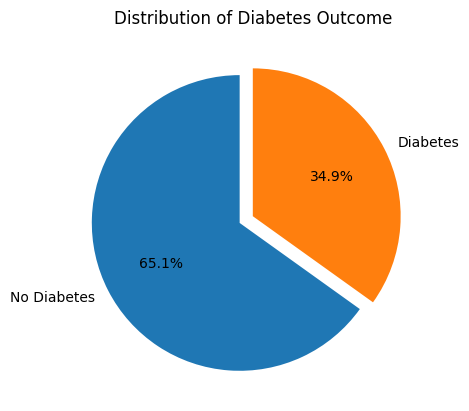

In [4]:
#Create the pie chart
outcome=diabetic_df['Outcome'].value_counts(normalize=True)
labels= ['No Diabetes', 'Diabetes']
explode = (0.1, 0)  # To emphasize the 'Diabetes' slice
fig, ax = plt.subplots()
ax.pie(x=outcome,
       labels=labels,
       autopct='%1.1f%%', explode=explode,
       startangle=90)

#Autopct causes the percents to be rounded.  Startangle causes the starting place
#on the pie chart to be vertical
ax.set_title('Distribution of Diabetes Outcome')
plt.show()

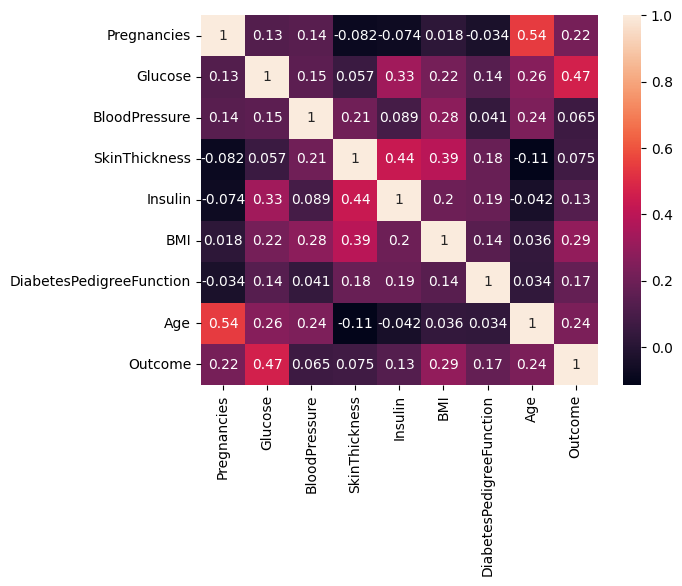

In [5]:
#Plot the correlation heatmap
sns.heatmap(diabetic_df.corr(),annot=True);

<Axes: ylabel='Count'>

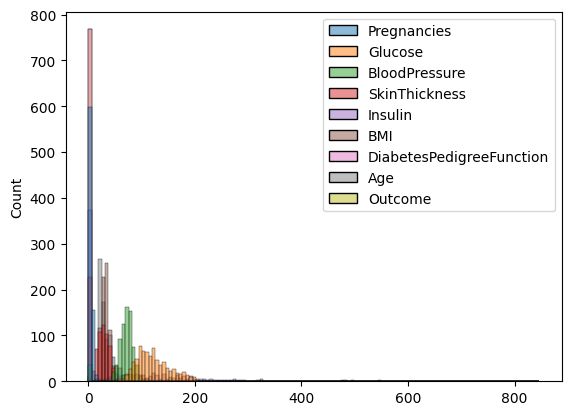

In [6]:
sns.histplot(diabetic_df)

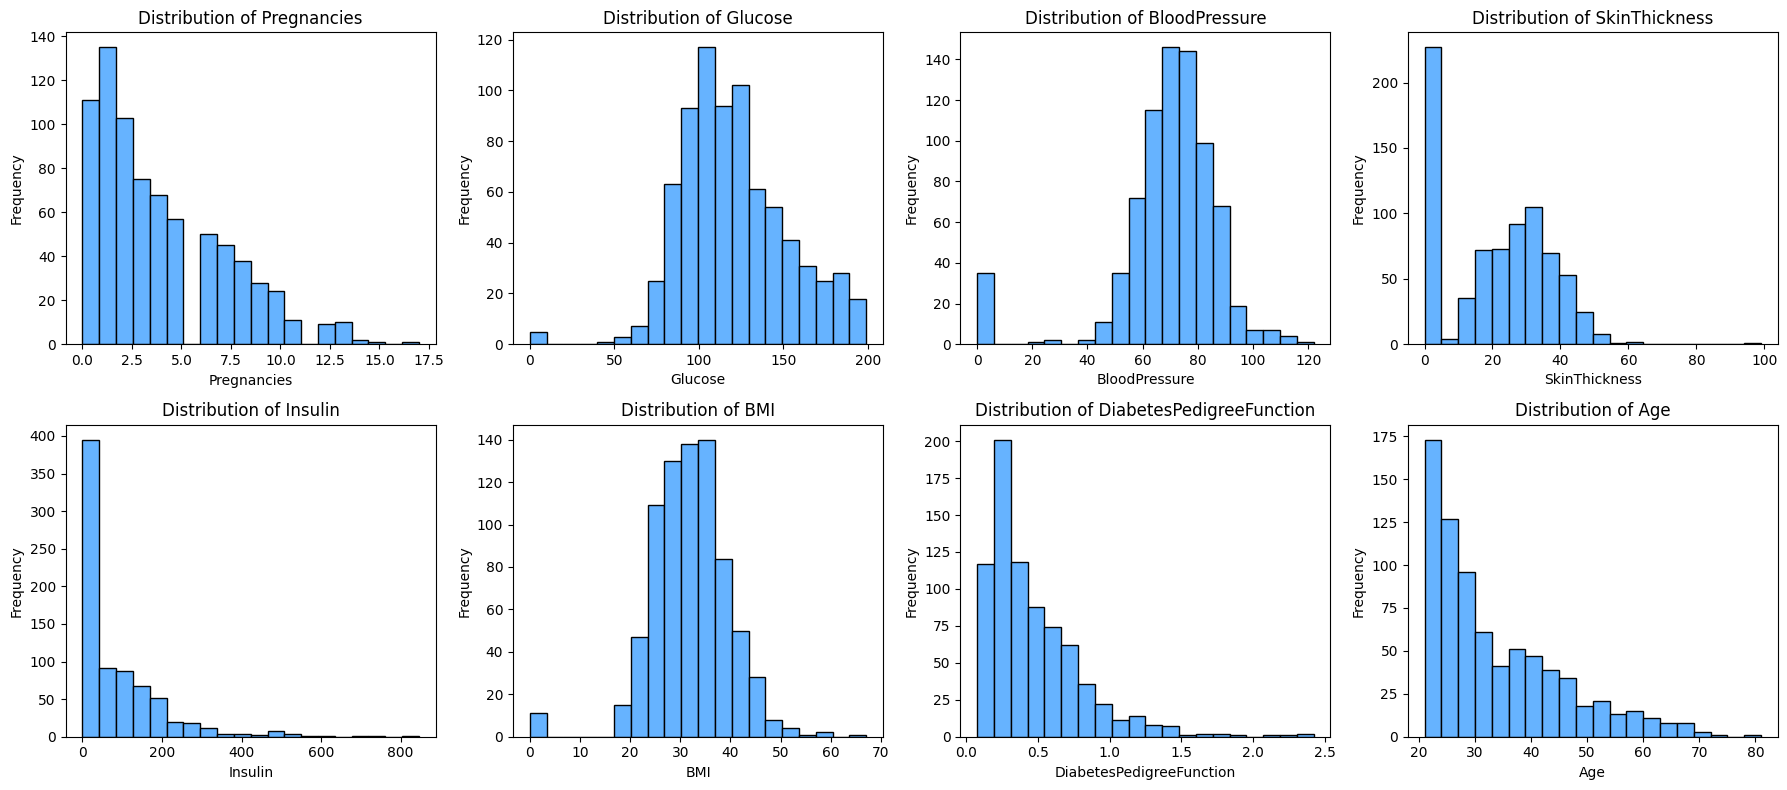

In [7]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(18, 8))

for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.hist(diabetic_df[features[i-1]], bins=20,color='#66b3ff', edgecolor='black')
    plt.title(f'Distribution of {features[i-1]}')
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

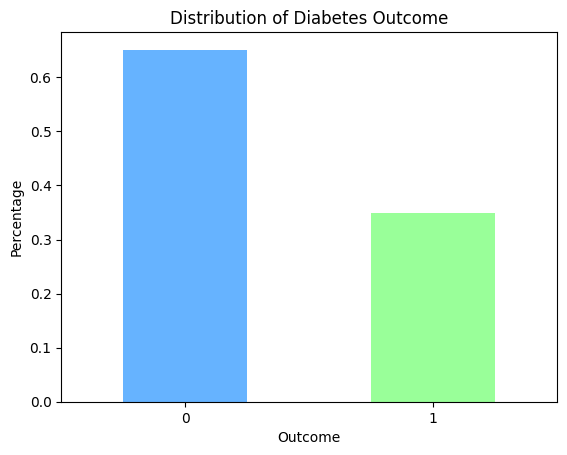

In [8]:
outcome_counts = diabetic_df['Outcome'].value_counts(normalize=True)

# Plotting a bar plot
colors = ['#66b3ff', '#99ff99']  # You can customize the colors

outcome_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

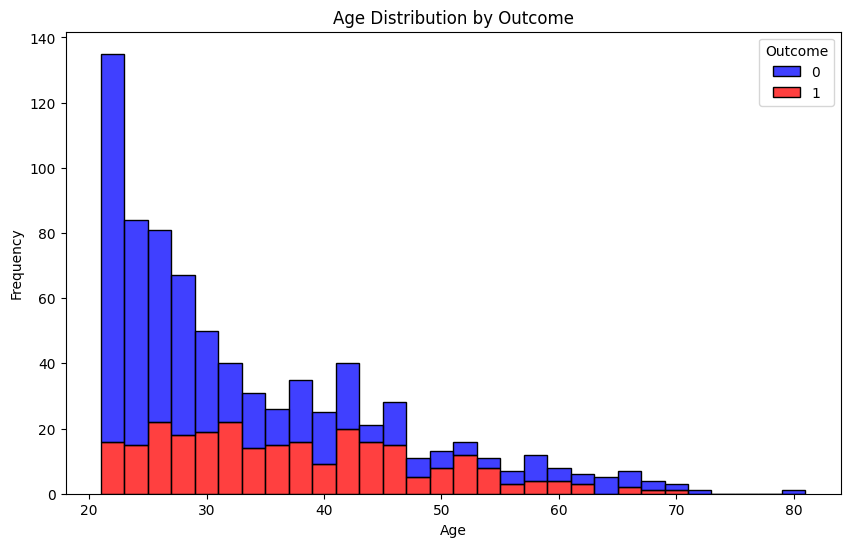

In [9]:
custom_palette = {1: 'red', 0: 'blue'}
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_df, x='Age', hue='Outcome', bins=30, multiple='stack', palette=custom_palette)
plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

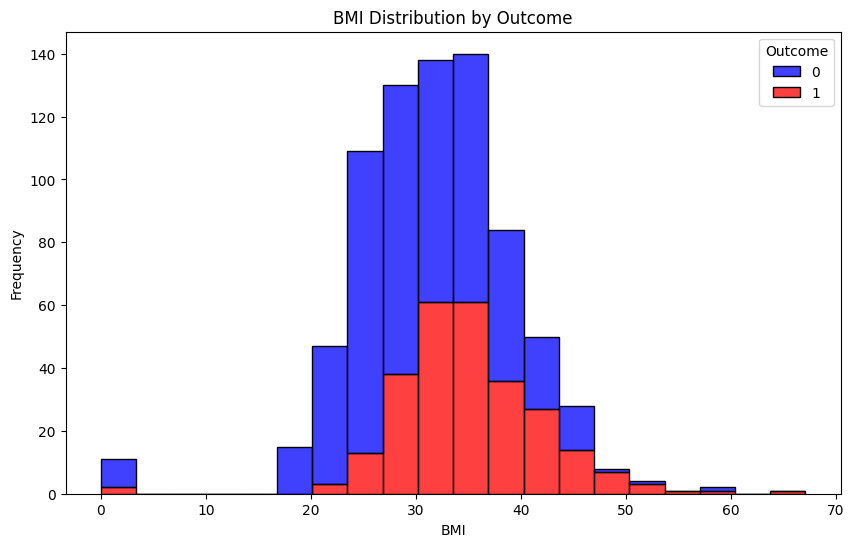

In [10]:
custom_palette = {1: 'red', 0: 'blue'}
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_df, x='BMI', hue='Outcome', bins=20, multiple='stack', palette=custom_palette)
plt.title('BMI Distribution by Outcome')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

Text(0.5, 1.0, 'Box Plot of All Columns')

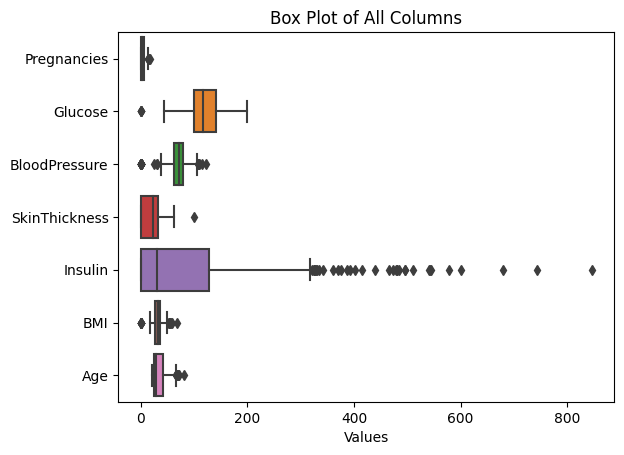

In [11]:
#outlin=[ 'Pregnancies', 'Glucose','BloodPressure','SkinThickness',
      # 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
outlin=[ 'Pregnancies', 'Glucose','BloodPressure','SkinThickness',
       'Insulin', 'BMI','Age']

sns.boxplot(data=diabetic_df[outlin], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
outlin = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Function to remove outliers using IQR
def remove_outliers_iqr(diabetic_df, columns):
    for column in columns:
        Q1 = diabetic_df[column].quantile(0.25)
        Q3 = diabetic_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        diabetic_df= diabetic_df[(diabetic_df[column] >= lower_bound) & (diabetic_df[column] <= upper_bound)]
    return diabetic_df

# Remove outliers
df_no_outliers = remove_outliers_iqr(diabetic_df, outlin)
daibetic_df=df_no_outliers
daibetic_df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Text(0.5, 1.0, 'Box Plot of All Columns')

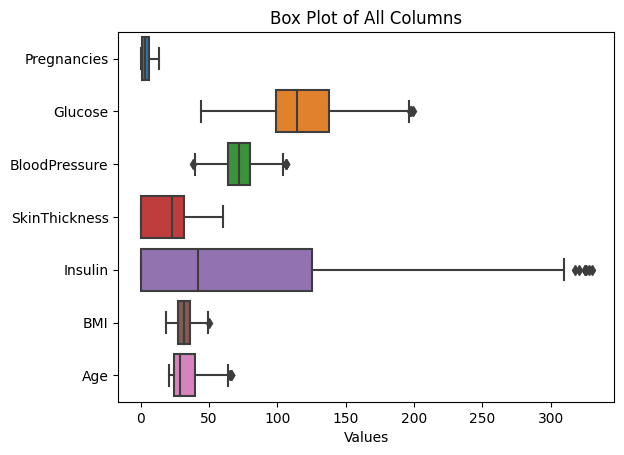

In [13]:
#import seaborn  as sns
#import matplotlib.pyplot as plt
#outlin=[ 'Pregnancies', 'Glucose','BloodPressure','SkinThickness',
      # 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
outlin=[ 'Pregnancies', 'Glucose','BloodPressure','SkinThickness',
       'Insulin', 'BMI','Age']

sns.boxplot(data=daibetic_df[outlin], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [14]:
daibetic_df.shape

(669, 9)

Text(0.5, 1.0, 'Distribution of all Variables')

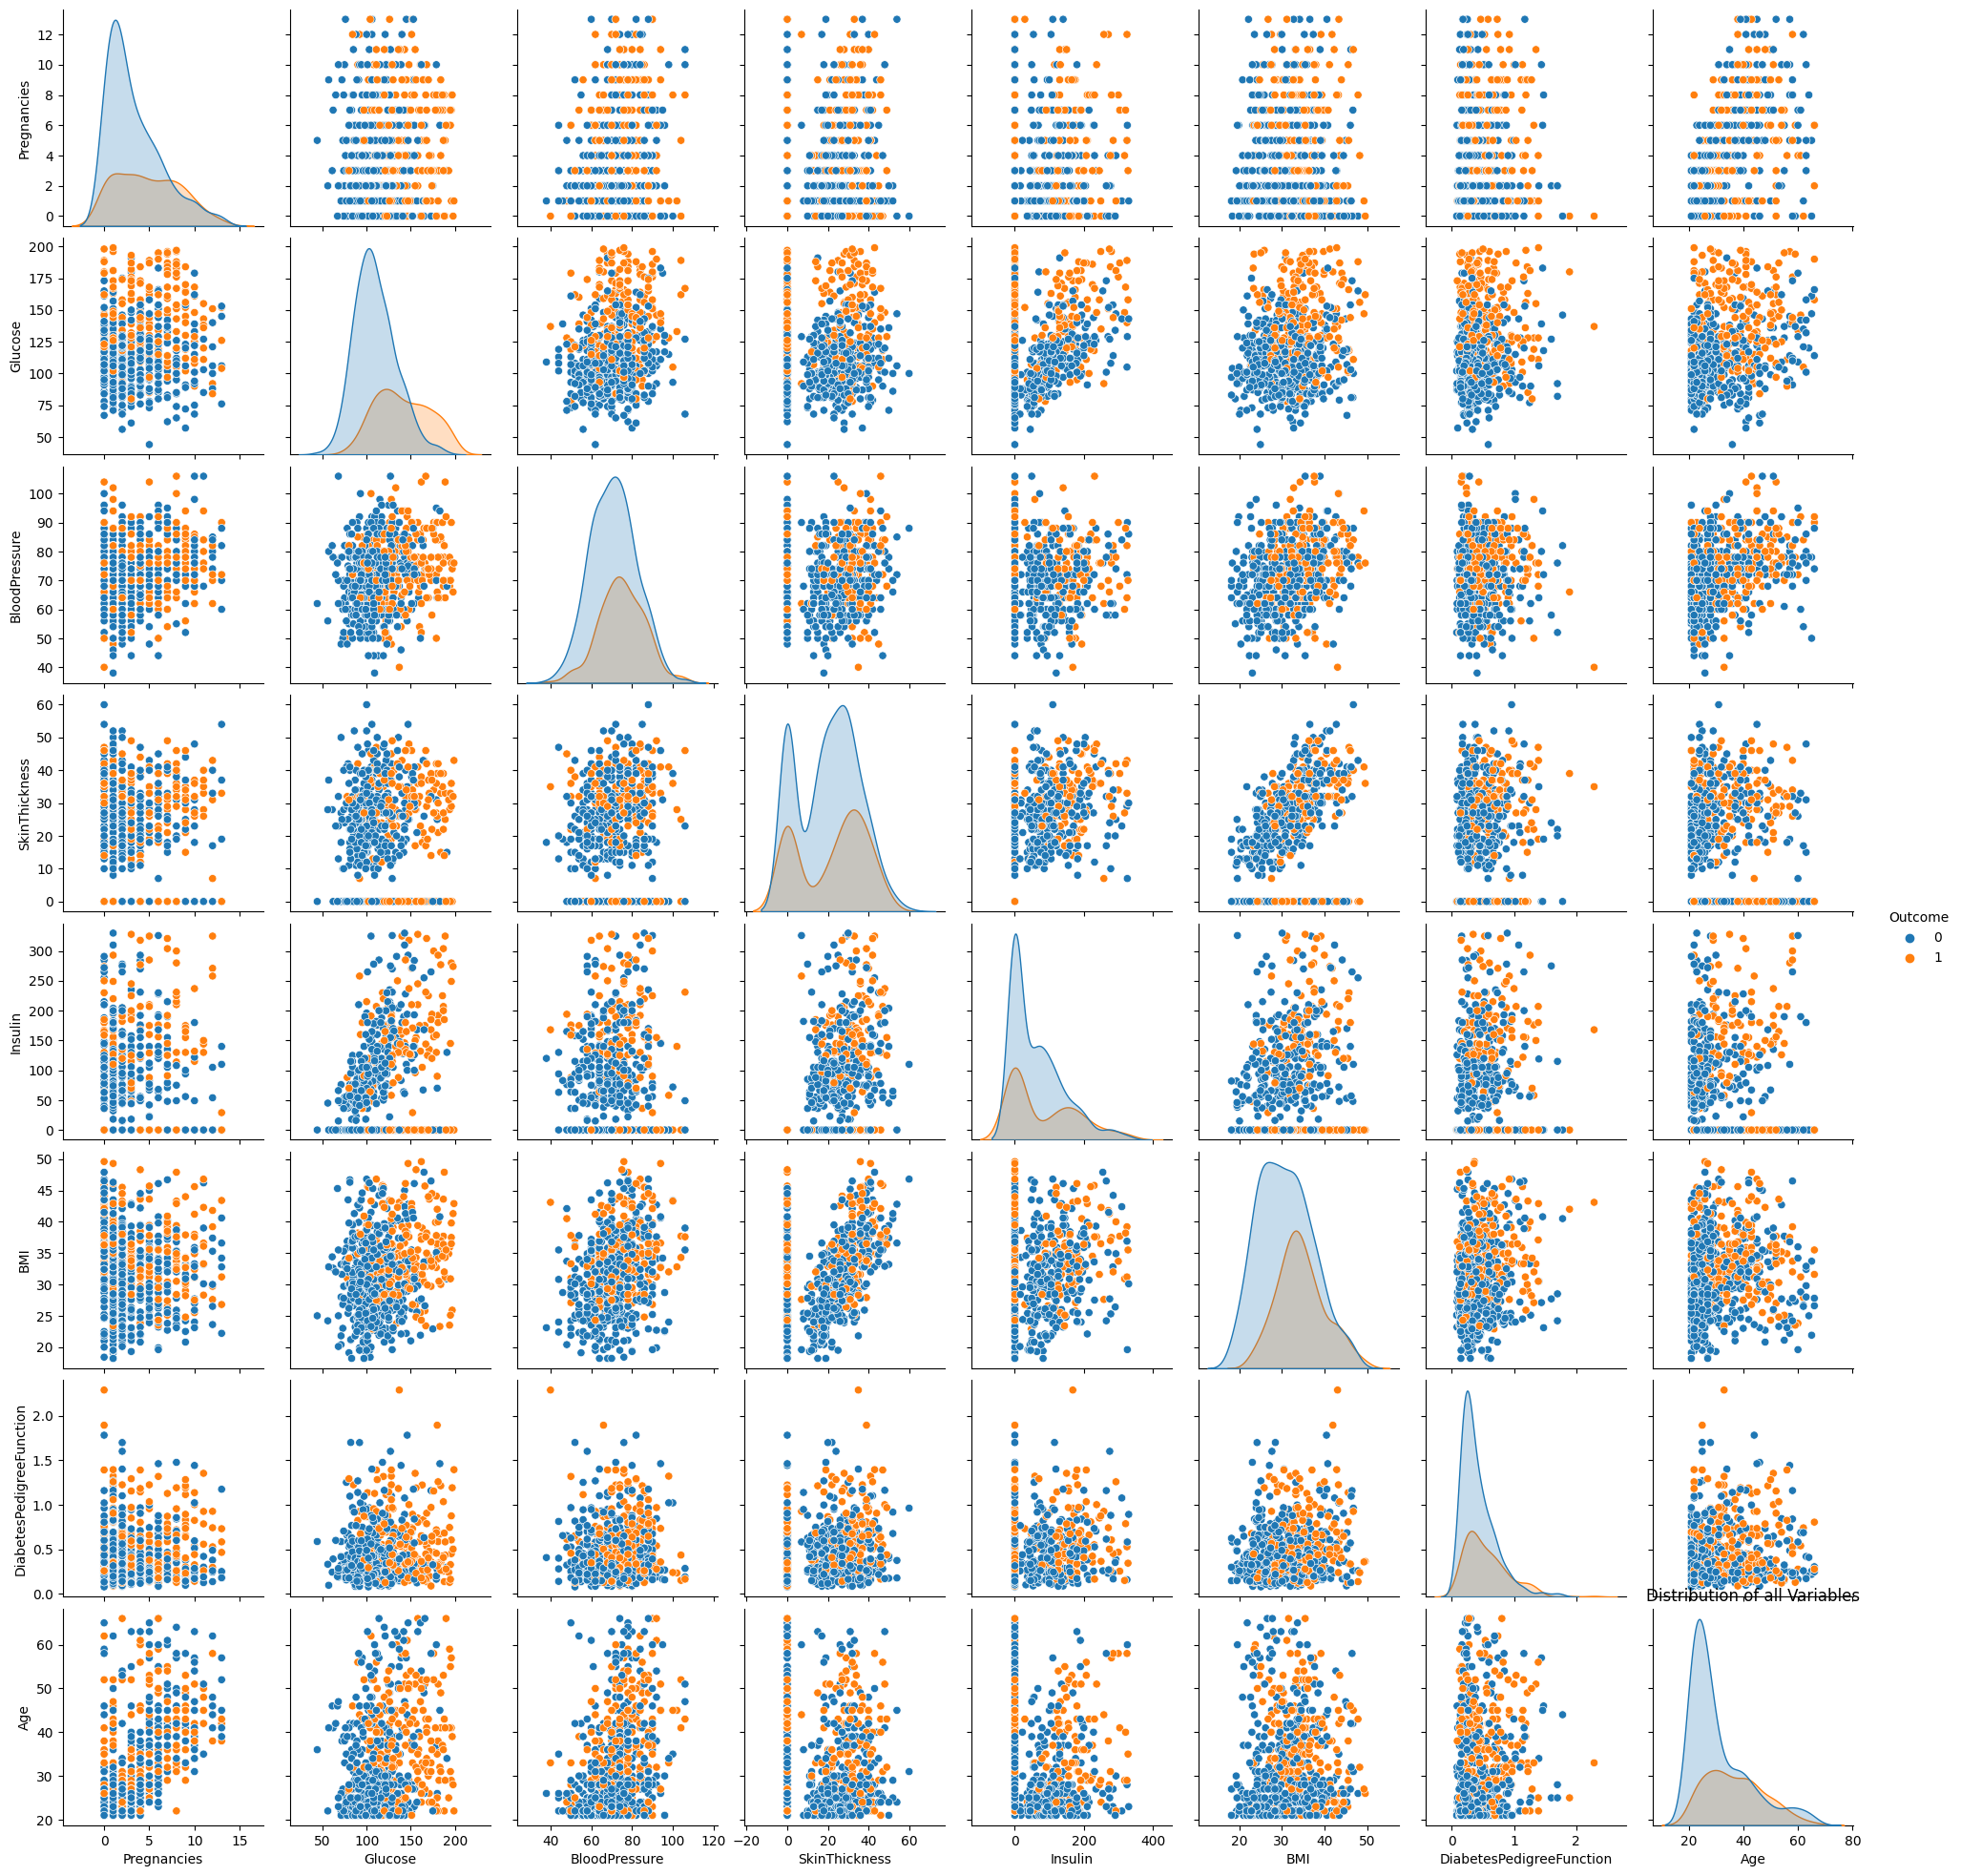

In [15]:
sns.pairplot(data=daibetic_df,hue='Outcome')
plt.title("Distribution of all Variables")

In [16]:
train=daibetic_df

In [17]:
X=train.drop('Outcome',axis=1)
y=train['Outcome']

In [18]:
X.shape,y.shape

((669, 8), (669,))

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,train_size=0.8, random_state=41)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((535, 8), (535,), (134, 8), (134,))

In [23]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
408,8,197,74,0,0,25.9,1.191,39
629,4,94,65,22,0,24.7,0.148,21
57,0,100,88,60,110,46.8,0.962,31
622,6,183,94,0,0,40.8,1.461,45
482,4,85,58,22,49,27.8,0.306,28


In [24]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
164,0,131,88,0,0,31.6,0.743,32
249,1,111,86,19,0,30.1,0.143,23
328,2,102,86,36,120,45.5,0.127,23
462,8,74,70,40,49,35.3,0.705,39
343,5,122,86,0,0,34.7,0.290,33


# Logistic regression

In [25]:
# Logistic Regression
logmodel = make_pipeline(
    #SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)
logmodel.fit(X_train, y_train)

# Print the model and its accuracy
print("train accuracy:", accuracy_score(y_train, logmodel.predict(X_train)))

train accuracy: 0.7757009345794392


In [26]:
# Prediction
y_pred =logmodel.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model test accuracy (in %):", acc)

Logistic Regression model test accuracy (in %): 0.7761194029850746


**Train accuracy=77.6%and test accuracy 77.6%**

# **DecisionTree Classifier**

In [27]:
#Building our first model (DecisionTreeClassifier)
pipeline=make_pipeline(
   #ce.OrdinalEncoder(),
   StandardScaler(),
   DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,max_depth=3,min_samples_split=5,max_features='sqrt',random_state=42)
)
pipeline.fit(X_train,y_train)
print("trainValidation Accuracy",pipeline.score(X_train,y_train))

trainValidation Accuracy 0.7420560747663552


In [28]:
print("test Accuracy",pipeline.score(X_test,y_test))

test Accuracy 0.7238805970149254


**Train accuracy=74.21% and test accuracy=72.39**

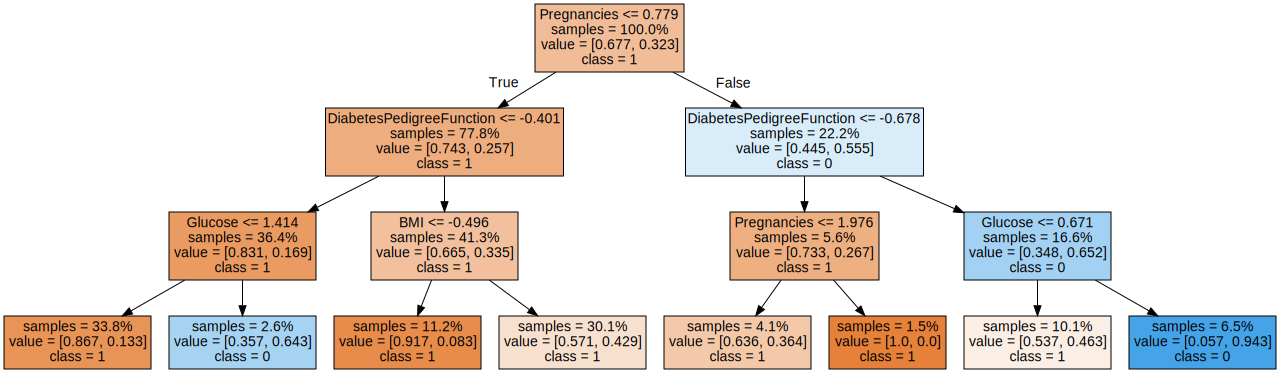

In [29]:
#This score is too good to be true.
# Visualize the decision tree, to see what the model 'learned'

#import graphviz
#from sklearn.tree import export_graphviz
tree = pipeline.named_steps['decisiontreeclassifier']
dot_data= export_graphviz(
    tree,
    out_file=None,
    feature_names = X_train.columns,
    class_names = y_train.unique().astype(str),
    filled = True,
    impurity= False,
    proportion = True

)
graphviz.Source(dot_data)

#Random Forest

In [30]:
'''T6. Build a pipeline `model` with encoder and tree-based predictor.'''

# YOUR CODE HERE
#raise NotImplementedError()

model= make_pipeline(
    #ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestClassifier(max_depth=2,min_samples_split=10,min_samples_leaf=4,n_estimators=100,random_state=91,n_jobs=-1,max_features='sqrt')
)
model.fit(X_train,y_train);
print("trainValidation Accuracy",model.score(X_train,y_train))

trainValidation Accuracy 0.788785046728972


In [31]:
print("test Accuracy",model.score(X_test,y_test))


test Accuracy 0.753731343283582


**Train accuracy=78.87 and Test accuracy=75.37**

In [32]:
y_train_pred=model.predict(X_train)

y_test_pred=model.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [33]:
#from sklearn.metrics import accuracy_score

train_acc =  accuracy_score(y_train_pred,y_train)
test_acc =  accuracy_score(y_test_pred,y_test)

print('Training Accuracy Score:', train_acc)
print('Testing Accuracy Score:', test_acc)


Training Accuracy Score: 0.788785046728972
Testing Accuracy Score: 0.753731343283582


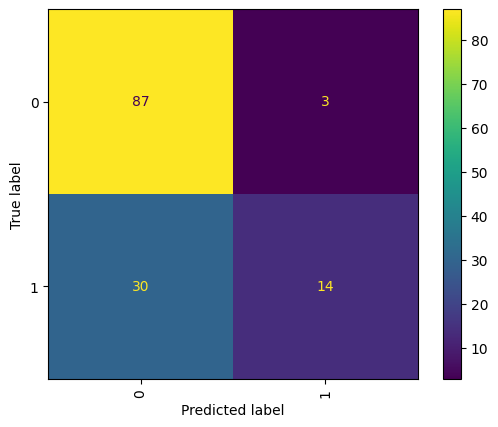

In [34]:
#from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,values_format='.0f',xticks_rotation='vertical')

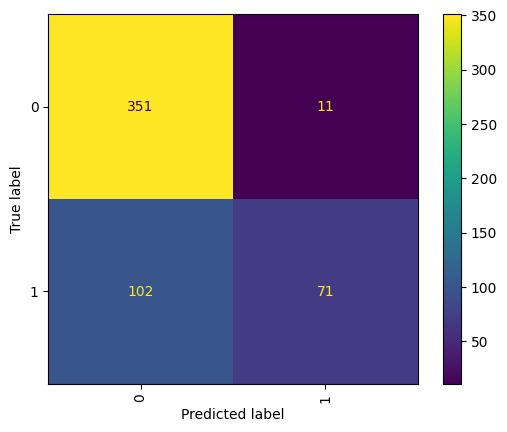

In [35]:
#from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model,X_train,y_train,values_format='.0f',xticks_rotation='vertical')

# Print classification report

In [36]:
from sklearn.metrics import classification_report

# Assuming 'model' is your trained classification model, X_train is your feature matrix, and y_train is your target variable

# Make predictions on the training set
# Print the classification report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       362
           1       0.87      0.41      0.56       173

    accuracy                           0.79       535
   macro avg       0.82      0.69      0.71       535
weighted avg       0.80      0.79      0.76       535



In [37]:
#from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:,1] #probability for the last class
roc_auc_score(y_test,y_pred_proba)

0.8044191919191919

# XGBoost

In [38]:
#Model and its Score
#Here, we are using XGBClassifier as a Machine Learning model to fit the data.
#from  xgboost import XGBClassifier
#from sklearn.preprocessing import LabelEncoder
model_xgb_oh = make_pipeline(
StandardScaler(),
XGBClassifier(max_depth=2,n_estimators=50,random_state=41,n_jobs=-1,learning_rate=0.1)
)
# Now, you can fit the model using the encoded target variable
model_xgb_oh .fit(X_train, y_train)

# Print the model and its accuracy
print()
print(model_xgb_oh )
print("train accuracy:", model_xgb_oh .score(X_train, y_train))


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_str

In [39]:
# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
#y_test_encoded= label_encoder.fit_transform(y_test)
scoretest = model_xgb_oh .score(X_test,y_test)
print(scoretest)

0.7985074626865671


**Train accuracy=83 and Test accuracy=80**

# Confusion metrix on train

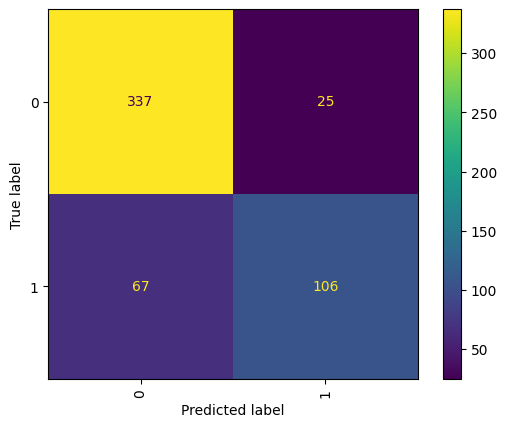

In [40]:
#from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model_xgb_oh,X_train,y_train,values_format='.0f',xticks_rotation='vertical')

In [41]:
#TP=106,FP=25, TN=337, FN=67

#specificity= TN / (TN + FP)
specificity =337/(337+25)
print("specificity:",round(specificity,2))

#sensitivity=TP / (TP + FN)
sensitivity=106/(106+67)
print("sensitivity:",round(sensitivity,2))

#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy= (106+337)/(106+337+25+67)
print("accuracy:",round(accuracy,2))

specificity: 0.93
sensitivity: 0.61
accuracy: 0.83


In [42]:
#precision = TP/TP+FP
precision  = 106/(106+25)
print("precision:",round(precision,2))

#recall TP/TP+FN
recall = 106/(106+67)
print("recall:",round(recall,2))

precision: 0.81
recall: 0.61


# Print classification report

In [43]:
print(classification_report(y_train, model_xgb_oh.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       362
           1       0.81      0.61      0.70       173

    accuracy                           0.83       535
   macro avg       0.82      0.77      0.79       535
weighted avg       0.83      0.83      0.82       535



# Confusin metrix on text

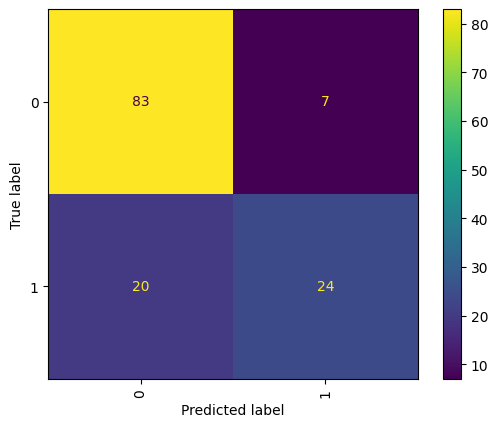

In [44]:
#from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model_xgb_oh,X_test,y_test,values_format='.0f',xticks_rotation='vertical')

sensitivity, true positive rate = TP / (TP + FN)

specificity, true negative rate = TN / (TN + FP)

accuracy = (TP + TN) / (TP + TN + FP + FN)

In [45]:
#TP=24,FP=7, TN=83, FN=20

#specificity= TN / (TN + FP)
specificity =83/(83+7)
print("specificity:",round(specificity,2))

#sensitivity=TP / (TP + FN)
sensitivity=24/(24+20)
print("sensitivity:",round(sensitivity,2))

#accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy= (24+83)/(24+83+7+20)
print("accuracy:",round(accuracy,2))

specificity: 0.92
sensitivity: 0.55
accuracy: 0.8


In [46]:
#precision = TP/TP+FP
precision  = 24/(24+7)
print("precision:",round(precision,2))

#recall TP/TP+FN
recall = 24/(24+20)
print("recall:",round(recall,2))

precision: 0.77
recall: 0.55


# Print classification report

In [47]:
print(classification_report(y_test, model_xgb_oh.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        90
           1       0.77      0.55      0.64        44

    accuracy                           0.80       134
   macro avg       0.79      0.73      0.75       134
weighted avg       0.80      0.80      0.79       134



# **roc_auc score for train**

In [48]:
y_pred_proba = model_xgb_oh.predict_proba(X_train)[:,1] #probability for the last class
roc_auc_score(y_train,y_pred_proba)

0.9064126720531408

# **roc_auc curve of train**

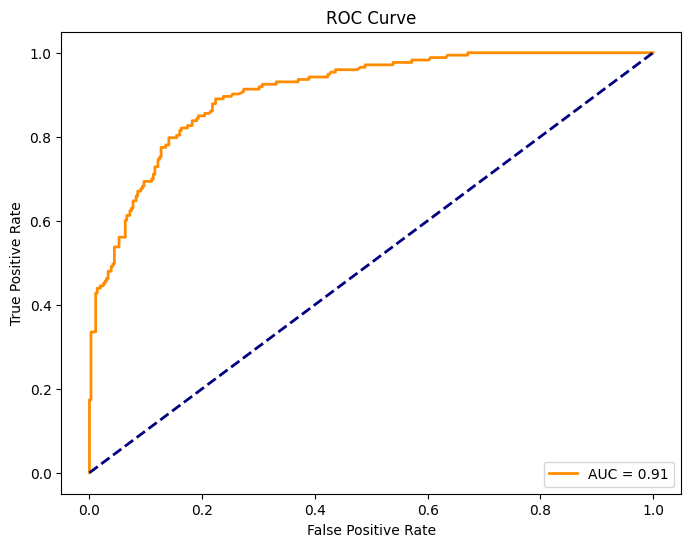

In [50]:
from sklearn.metrics import auc,roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Calculate the AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **roc_auc score for test**

In [51]:
y_pred_proba = model_xgb_oh.predict_proba(X_test)[:,1] #probability for the last class
roc_auc_score(y_test,y_pred_proba)

0.8525252525252526

# roc curve - test

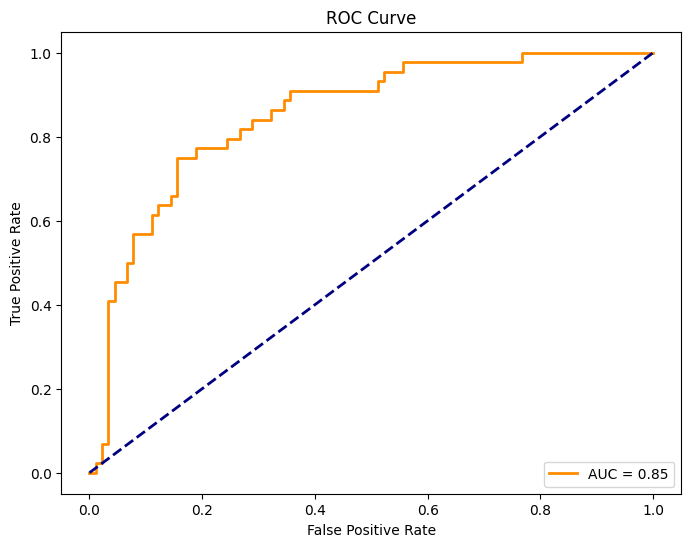

In [52]:
from sklearn.metrics import auc,roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# XGBost is the best model and it gives me the best accuracy-To determine whether a person has diabetes based on certain features or risk factors.
# **Train accuracy=83 and Test accuracy=80**

# XGBoost exhibits promising performance in diabetic prediction, achieving a train accuracy of 83% and a test accuracy of 80%